In [15]:
import pandas as pd
import warnings
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

import chardet
import re


#https://www.kaggle.com/kwullum/fatal-police-shootings-in-the-us/kernels?sortBy=hotness&group=everyone&pageSize=20&datasetId=2647&language=Python&kernelType=Notebook

In [16]:
poverty_path = 'PercentagePeopleBelowPovertyLevel.csv'
income_path = 'MedianHouseholdIncome2015.csv'
hs_path = 'PercentOver25CompletedHighSchool.csv'
police_path = 'PoliceKillingsUS.csv'
race_path = 'ShareRaceByCity.csv'



files = [ poverty_path, income_path, hs_path,race_path, police_path]
data = {}

for file in files:
    col_names = []
    for col in pd.read_csv(file, encoding='Windows-1252').columns:  #file encodings are in Windows-1252
        if bool(re.match('^Unnamed', col) ) == False:
            col_names.append(col)
            data[file] = col_names




In [17]:
for file, cols in data.items():
    df = pd.read_csv(file,encoding='Windows-1252')
    print(df.head())
    print(df.describe())

  Geographic Area             City poverty_rate
0              AL       Abanda CDP         78.8
1              AL   Abbeville city         29.1
2              AL  Adamsville city         25.5
3              AL     Addison town         30.7
4              AL       Akron town           42
       Geographic Area           City poverty_rate
count            29329          29329        29329
unique              51          24255          771
top                 PA  Franklin city            0
freq              1762             16         1464
   Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Unnamed: 0.1.1.1  \
0           0             0               0                 0   
1           1             1               1                 1   
2           2             2               2                 2   
3           3             3               3                 3   
4           4             4               4                 4   

   Unnamed: 0.1.1.1.1 Geographic Area             City Median Inco

In [18]:
poverty_data = pd.read_csv(poverty_path,
                           encoding='Windows-1252',
                           na_values = ['UNKNOWN', 'UNK','(X)','-', None],
                           na_filter = True,
                           skip_blank_lines=True)[data[poverty_path]]
income_data = pd.read_csv(income_path,
                          encoding='Windows-1252',
                          na_values = ['UNKNOWN', 'UNK','(X)','-',None],
                          na_filter = True,
                          skip_blank_lines=True)[data[income_path]]
hs_data = pd.read_csv(hs_path,
                      encoding='Windows-1252',
                      na_values = ['UNKNOWN', 'UNK','(X)','-','nan',None],
                      na_filter = True,
                      skip_blank_lines=True)[data[hs_path]]
race_data = pd.read_csv(race_path,
                        encoding='Windows-1252',
                        na_values = ['UNKNOWN', 'UNK','(X)','-','nan',None],
                        na_filter = True,
                        skip_blank_lines=True)[data[race_path]]
police_data = pd.read_csv(police_path,
                          encoding='Windows-1252',
                          na_values = ['UNKNOWN', 'UNK','(X)','-',None],
                          na_filter = True,
                          skip_blank_lines=True)[data[police_path]]

poverty_data = poverty_data.rename(columns = {'Geographic Area':'State'})
income_data = income_data.rename(columns = {'Geographic Area':'State'})
hs_data = hs_data.rename(columns = {'Geographic Area':'State'})
race_data = race_data.rename(columns = {'Geographic area':'State'})

#print(poverty_data.head(), '\n', income_data.head(),'\n', hs_data.head(),'\n', race_data.head(),'\n',police_data.head())


In [21]:

dfs = [poverty_data, income_data, hs_data, race_path]
df1 = pd.merge (poverty_data, income_data, on = ['State','City'], how = 'inner')
df2 = pd.merge (df1, hs_data, on = ['State','City'], how = 'inner')
df = pd.merge (df2, race_data, on = ['State','City'], how = 'inner') 

In [22]:
#Remove the CDP from the City column
df.dropna(inplace = True )

df.City = df.City.apply(lambda x: x.strip('CDP'))
df['Median Income'] = df['Median Income'].apply(lambda x: x.replace(',',''))


,State,City,poverty_rate,Median Income,percent_completed_hs,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda,78.8,11207,21.2,67.2,30.2,0.0,0.0,1.6
1,AL,Abbeville city,29.1,25615,69.1,54.4,41.4,0.1,1.0,3.1
2,AL,Adamsville city,25.5,42575,78.9,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,30.7,37083,81.4,99.1,0.1,0.0,0.1,0.4
4,AL,Akron town,42.0,21667,68.6,13.2,86.5,0.0,0.0,0.3


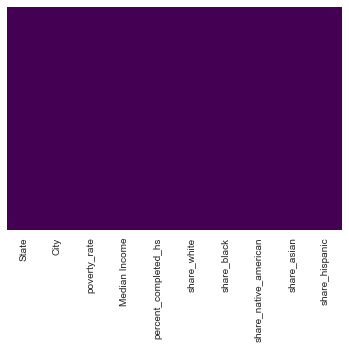

In [23]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
df['Median Income'].isnull().value_counts()
    
df.head()

In [6]:
df.describe()

,poverty_rate,percent_completed_hs,share_white,share_black,share_native_american,share_asian,share_hispanic
count,27243.000000,27243.000000,27243.000000,27243.000000,27243.000000,27243.000000,27243.000000
mean,16.141130,86.086532,83.158525,7.034710,2.701035,1.612638,8.814297
std,11.891228,10.495834,21.499849,15.740442,12.195084,4.400505,16.217029
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.400000,81.300000,78.400000,0.200000,0.100000,0.000000,1.200000
50%,13.800000,88.400000,92.400000,0.900000,0.300000,0.400000,2.900000
75%,22.200000,93.300000,96.800000,4.600000,0.800000,1.300000,7.850000
max,100.000000,100.000000,100.000000,100.000000,100.000000,67.100000,100.000000


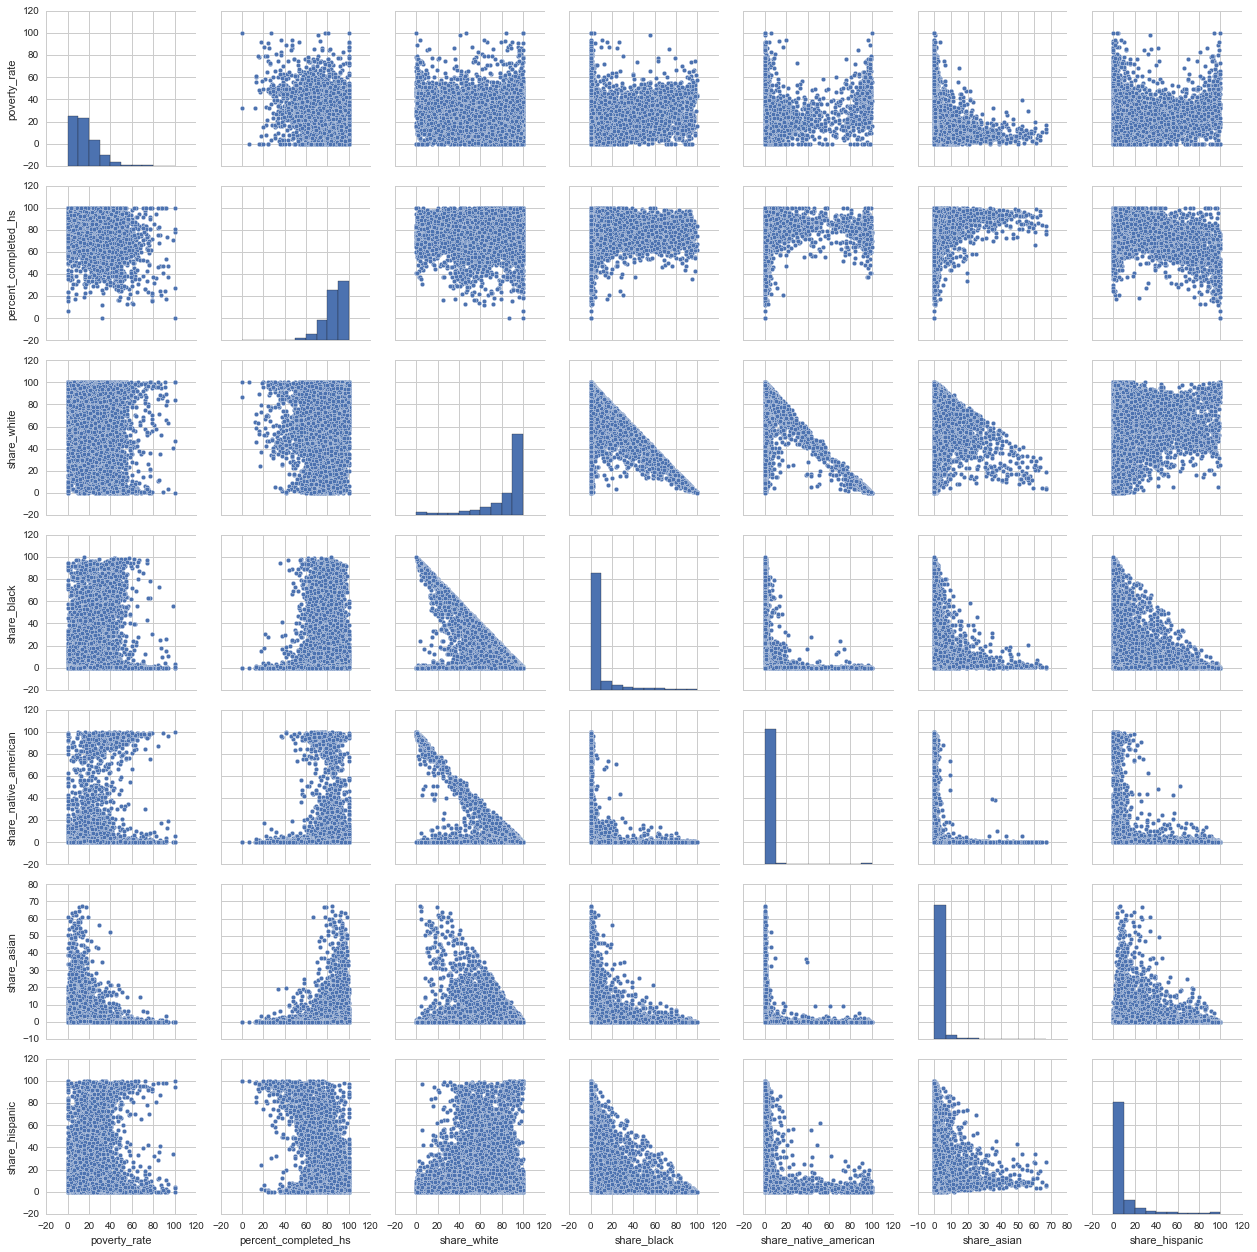

In [7]:
sns.pairplot(df,size = 2.5)


In [8]:
#From the pairplot it seems that there is a trend for whites and asians to have a greater percent completion of hs... 
#...and lower poverty level than hispanics, blacks, and native americans. 

In [9]:
states = df.State.unique()
df = df.set_index('State')

states

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [10]:
# Create a dictionary keyed by state whose values is a list containing the averages from the features of df. 

state_avg = {}
x = 0
for state in states:
    rows = df.loc[state]
    
    percent_white = rows.share_white.mean()
    percent_black = rows.share_black.mean()
    percent_native_american = rows.share_native_american.mean()
    percent_asian = rows.share_asian.mean()
    percent_hispanic = rows.share_hispanic.mean()

   
    #avg_median_income = rows['Median Income'].mean()
    avg_complete_hs = rows.percent_completed_hs.mean()
    avg_poverty_rate = rows.poverty_rate.mean()
    
    state_avg[state] = [ percent_white, percent_black, percent_native_american, percent_asian, percent_hispanic,
                       avg_complete_hs, avg_poverty_rate ]

In [11]:
#Using the dictionary we just made, we can create a dataframe. The output of the pd.DataFrame is (row = index number, column = state)
#We want the format to be the inverse of that , so we transpose the row and column labels and rename the column to with the proper labels.
df2 = pd.DataFrame(state_avg)
df2 = df2.loc[:,'AK':'WY'].T
df2 = df2.rename(columns = {0:'percent_white', 1:'percent_black', 2: 'percent_native_american',3: 'percent_asian',
                            4:'percent_hispanic', 5:'avg_completed_hs',6:'avg_poverty_rate'})
df2.head()

,percent_white,percent_black,percent_native_american,percent_asian,percent_hispanic,avg_completed_hs,avg_poverty_rate
AK,39.941053,0.610175,51.296842,1.622807,2.094737,84.914737,20.156140
AL,73.354545,22.401299,0.638404,0.510946,3.062523,80.694620,20.356772
AR,78.227148,16.663867,0.714453,0.480859,4.188281,80.287500,23.096094
AZ,61.117742,1.008333,26.619892,0.778763,21.692742,80.545968,25.344892
CA,70.620477,2.917200,1.667238,6.064929,30.804021,81.816456,16.778034


In [12]:
df2.corr()

,percent_white,percent_black,percent_native_american,percent_asian,percent_hispanic,avg_completed_hs,avg_poverty_rate
percent_white,1.000000,-0.580666,-0.412045,-0.489228,-0.274240,0.395559,-0.463084
percent_black,-0.580666,1.000000,-0.220270,-0.026966,-0.099149,-0.465601,0.462013
percent_native_american,-0.412045,-0.220270,1.000000,-0.094815,0.169875,-0.158963,0.284887
percent_asian,-0.489228,-0.026966,-0.094815,1.000000,0.143263,0.219629,-0.208436
percent_hispanic,-0.274240,-0.099149,0.169875,0.143263,1.000000,-0.294879,0.144865
avg_completed_hs,0.395559,-0.465601,-0.158963,0.219629,-0.294879,1.000000,-0.869932
avg_poverty_rate,-0.463084,0.462013,0.284887,-0.208436,0.144865,-0.869932,1.000000


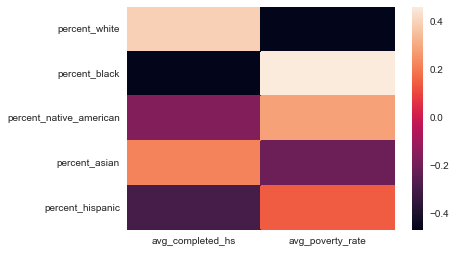

In [13]:
# Find correlations for averge completion of hs and average poverty rate.
df2_corr = df2.corr()[['avg_completed_hs','avg_poverty_rate']].head()
sns.heatmap(df2_corr)
# On average, there is a greater proportion of whites followed by Asians of completing hs while there is a negative correlation between blacks, hispanics, then native Americans
# On average, there is a negative correlation for whites and asians for poverty rate and a positive correlation for blacks, native american and hispanics for poverty rate.

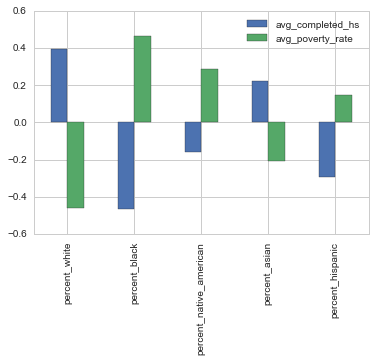

In [14]:
# another method in visualizing the differences between race
df2_corr[['avg_completed_hs', 'avg_poverty_rate']].plot.bar()

In [15]:
# What I have so far: 
# --> The poverty rate and completion of hs percentage of each race by city.
# --> I can't do much anlysis with each city, so I found the averages in each state.
# --> I can now look at the police killings and see how i can combine both datsets.
#    --> Possible ideas: Find where there may be correlations in death of races

In [16]:
#deal with the police data file on its own 
police_cols = [ 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city',
               'state', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera']
police_data = police_data[police_cols]
#police_data.state.value_counts()

In [17]:
#check that we have the right columns and change boolean values to numerical values
police_data.body_camera = police_data.body_camera.astype(int) 
police_data.signs_of_mental_illness = police_data.signs_of_mental_illness.astype(int)
police_data.dropna(inplace = True)
police_data = police_data.rename(columns = {'city' : 'City', 'state' : 'State'})
police_data.head()


police_data.head(10)


,manner_of_death,armed,age,gender,race,City,State,signs_of_mental_illness,threat_level,flee,body_camera
0,shot,gun,53.0,M,A,Shelton,WA,1,attack,Not fleeing,0
1,shot,gun,47.0,M,W,Aloha,OR,0,attack,Not fleeing,0
2,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,0,other,Not fleeing,0
3,shot,toy weapon,32.0,M,W,San Francisco,CA,1,attack,Not fleeing,0
4,shot,nail gun,39.0,M,H,Evans,CO,0,attack,Not fleeing,0
5,shot,gun,18.0,M,W,Guthrie,OK,0,attack,Not fleeing,0
6,shot,gun,22.0,M,H,Chandler,AZ,0,attack,Car,0
7,shot,gun,35.0,M,W,Assaria,KS,0,attack,Not fleeing,0
8,shot,unarmed,34.0,F,W,Burlington,IA,0,other,Not fleeing,1
9,shot,toy weapon,47.0,M,B,Knoxville,PA,0,attack,Not fleeing,0


In [18]:
police_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2254 entries, 0 to 2534
Data columns (total 11 columns):
manner_of_death            2254 non-null object
armed                      2254 non-null object
age                        2254 non-null float64
gender                     2254 non-null object
race                       2254 non-null object
City                       2254 non-null object
State                      2254 non-null object
signs_of_mental_illness    2254 non-null int64
threat_level               2254 non-null object
flee                       2254 non-null object
body_camera                2254 non-null int64
dtypes: float64(1), int64(2), object(8)
memory usage: 211.3+ KB


(array([0, 1]), <a list of 2 Text xticklabel objects>)

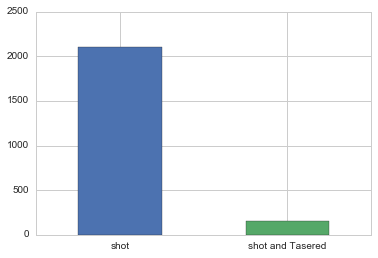

In [19]:
police_data.manner_of_death.value_counts().plot.bar()
plt.xticks(rotation=360)

# Most police officers did not start with the tasers and immedietly went with using firearms. But only about 50% of the 
# cases were the person armed with guns. Why did the police not just shoot them with a taser first? 



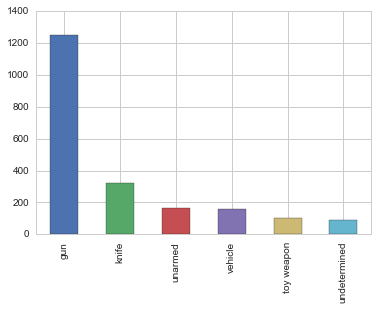

In [20]:
police_data.armed.value_counts().head(6).plot.bar()
# About half the cases there is a gun involved.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

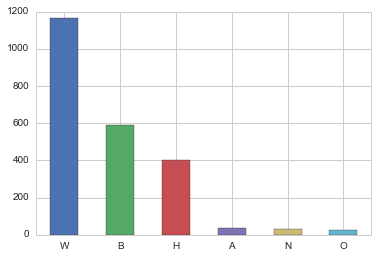

In [21]:
police_data.race.value_counts().plot.bar()
plt.xticks(rotation=360)
# The majority of people who are killed are whites, followed by blacks and hispanics.

(array([0, 1]), <a list of 2 Text xticklabel objects>)

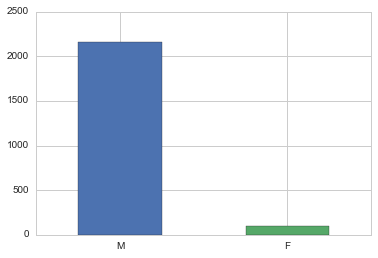

In [22]:
police_data.gender.value_counts().plot.bar()
plt.xticks(rotation=360)

#Majority are males

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

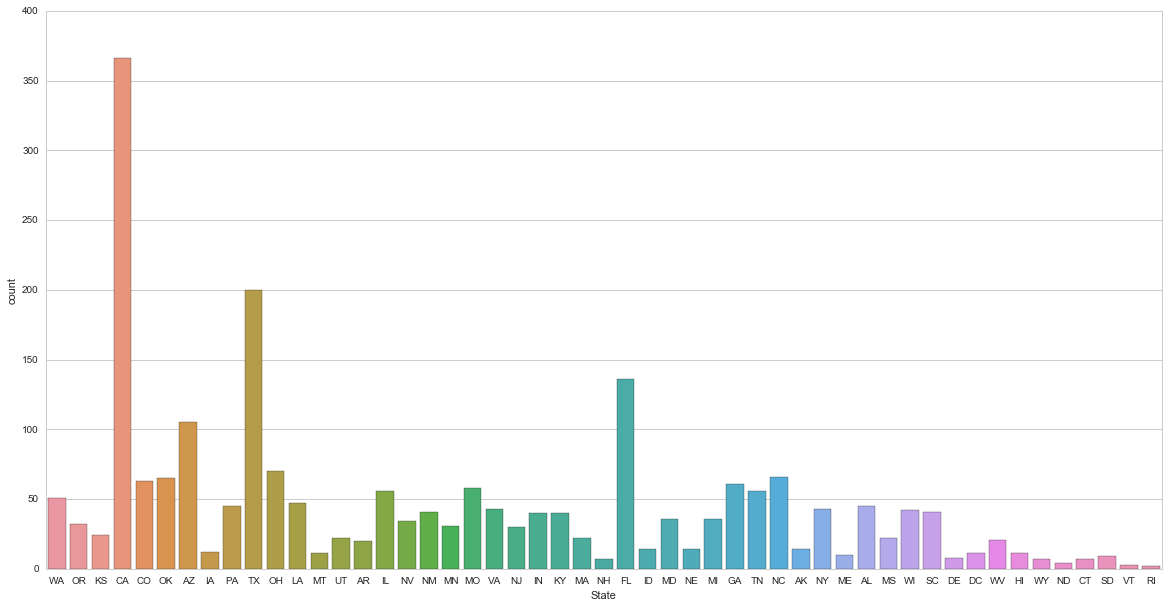

In [23]:
plt.figure(figsize=(20,10))
sns.countplot(police_data.State)
plt.xticks(rotation=360)
# Most of the killings are happen in California and California which have the largest areas by land.
# Could try to look into the total population in each state.

(array([0, 1]), <a list of 2 Text xticklabel objects>)

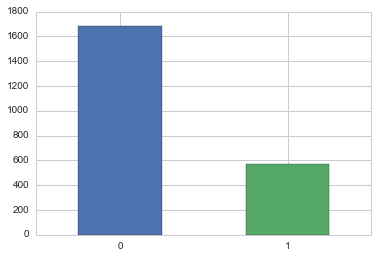

In [24]:
police_data.signs_of_mental_illness.value_counts().plot.bar()
plt.xticks(rotation=360) # 0 = False, 1 = True
# Most people do not have a mental illness, but there is a good percentage of people that do have a mental illness. 

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

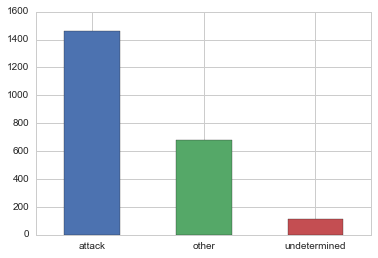

In [25]:
police_data.threat_level.value_counts().plot.bar()
plt.xticks(rotation=360)
# More than half the people are attacking someone (a victim or police officer?) but about 1/3 of the cases is unknown and undetermined
# Why is it undetermined? Shouldn't the police be able to judge the threat levels. 

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

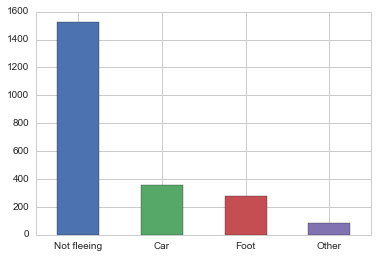

In [26]:
police_data.flee.value_counts().plot.bar()
plt.xticks(rotation=360)
# More than half the people are not fleeing.

(array([0, 1]), <a list of 2 Text xticklabel objects>)

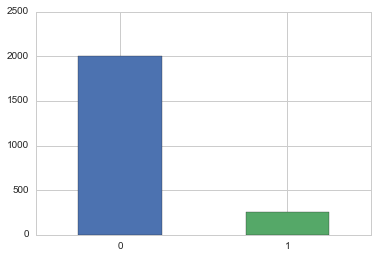

In [27]:
police_data.body_camera.value_counts().plot.bar() # or you could do sns.countplot(police_data.body_camera), where sns aggregates the count for you
plt.xticks(rotation=360) # 0 = False, 1 = True
# In about 80% of the situations, police officers did not have a body camera. Is there a connection between officers
# wearing cameras and using lethal force?

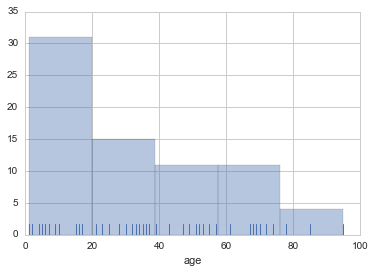

In [28]:
ages = police_data.age.value_counts()
sns.distplot(ages, kde=False, rug=True);


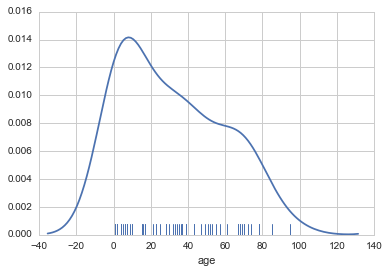

In [29]:
sns.distplot(ages, hist=False, rug=True);


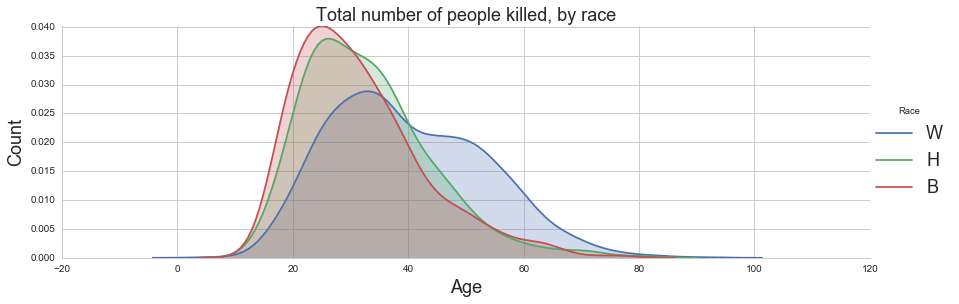

In [30]:
age_by_race = police_data[(police_data['race'] == 'B') | (police_data['race'] == 'W') | (police_data['race'] == 'H')] 

x = sns.FacetGrid(age_by_race, hue = 'race', aspect = 3, size = 4)
x.map(sns.kdeplot, 'age', shade = True)
plt.title("Total number of people killed, by race", fontsize=18)
x.add_legend(title = 'Race', fontsize = 18)
x.set_ylabels('Count', fontsize = 18)
x.set_xlabels('Age', fontsize = 18)

# The age distriution of blacks and hispanics is skewed to the left while the age distribution for whites is more normal.
# Thus, more blacks and dispanics are being killed at an earlier age than whites.


In [31]:
df2.head()

,percent_white,percent_black,percent_native_american,percent_asian,percent_hispanic,avg_completed_hs,avg_poverty_rate
AK,39.941053,0.610175,51.296842,1.622807,2.094737,84.914737,20.156140
AL,73.354545,22.401299,0.638404,0.510946,3.062523,80.694620,20.356772
AR,78.227148,16.663867,0.714453,0.480859,4.188281,80.287500,23.096094
AZ,61.117742,1.008333,26.619892,0.778763,21.692742,80.545968,25.344892
CA,70.620477,2.917200,1.667238,6.064929,30.804021,81.816456,16.778034


In [32]:
police_data.head()

,manner_of_death,armed,age,gender,race,City,State,signs_of_mental_illness,threat_level,flee,body_camera
0,shot,gun,53.0,M,A,Shelton,WA,1,attack,Not fleeing,0
1,shot,gun,47.0,M,W,Aloha,OR,0,attack,Not fleeing,0
2,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,0,other,Not fleeing,0
3,shot,toy weapon,32.0,M,W,San Francisco,CA,1,attack,Not fleeing,0
4,shot,nail gun,39.0,M,H,Evans,CO,0,attack,Not fleeing,0


In [33]:
df2 = df2.reset_index()
df2 = df2.rename(columns = {'index':'State'})
combined = pd.merge( police_data, df2, on = ['State'], how = 'outer' )



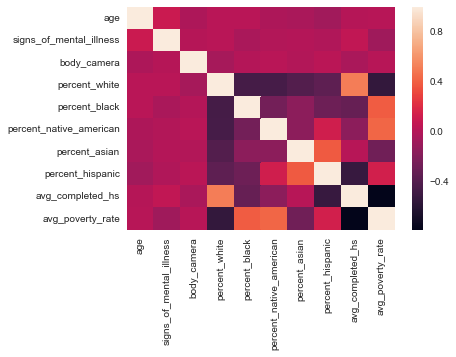

In [34]:
corr2 = combined.corr()
sns.heatmap(corr2)

In [35]:
combined.head()

,manner_of_death,armed,age,gender,race,City,State,signs_of_mental_illness,threat_level,flee,body_camera,percent_white,percent_black,percent_native_american,percent_asian,percent_hispanic,avg_completed_hs,avg_poverty_rate
0,shot,gun,53.0,M,A,Shelton,WA,1,attack,Not fleeing,0,82.995583,1.460424,3.260601,3.187102,10.409364,88.776148,14.170848
1,shot and Tasered,unarmed,35.0,M,H,Pasco,WA,1,other,Foot,0,82.995583,1.460424,3.260601,3.187102,10.409364,88.776148,14.170848
2,shot,unarmed,20.0,M,W,Sumas,WA,1,attack,Not fleeing,0,82.995583,1.460424,3.260601,3.187102,10.409364,88.776148,14.170848
3,shot,unarmed,37.0,M,N,Lakewood,WA,1,other,Foot,0,82.995583,1.460424,3.260601,3.187102,10.409364,88.776148,14.170848
4,shot,toy weapon,36.0,M,W,Kennewick,WA,1,attack,Not fleeing,0,82.995583,1.460424,3.260601,3.187102,10.409364,88.776148,14.170848


Now I will choose predictors for my model

In [36]:
y = combined.signs_of_mental_illness
signs_of_mental_illness_predictors = ['age', 'body_camera', 'percent_white', 'percent_black', 'percent_native_american', 'percent_asian', 'percent_hispanic','avg_completed_hs','avg_poverty_rate']
X = combined[signs_of_mental_illness_predictors]

In [37]:
from sklearn.tree import DecisionTreeRegressor
mental_illness_model = DecisionTreeRegressor()
mental_illness_model.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [38]:
print("Making predictions for the following 5 people:")
print(X.head())
print("The predictions are")
print(mental_illness_model.predict(X.head()))

Making predictions for the following 5 people:
    age  body_camera  percent_white  percent_black  percent_native_american  \
0  53.0            0      82.995583       1.460424                 3.260601   
1  35.0            0      82.995583       1.460424                 3.260601   
2  20.0            0      82.995583       1.460424                 3.260601   
3  37.0            0      82.995583       1.460424                 3.260601   
4  36.0            0      82.995583       1.460424                 3.260601   

   percent_asian  percent_hispanic  avg_completed_hs  avg_poverty_rate  
0       3.187102         10.409364         88.776148         14.170848  
1       3.187102         10.409364         88.776148         14.170848  
2       3.187102         10.409364         88.776148         14.170848  
3       3.187102         10.409364         88.776148         14.170848  
4       3.187102         10.409364         88.776148         14.170848  
The predictions are
[1.         0.25    

## Model Validation

In [39]:
# in-sample validation
from sklearn.metrics import mean_absolute_error

predicted_mental_illness = mental_illness_model.predict(X)
mean_absolute_error(y, predicted_mental_illness)

0.15363233089497508

## Random Forest 

In [40]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(["armed", "race", "gender", "City", "State", "threat_level", "flee"])

data_log = combined.apply(LabelEncoder().fit_transform)

X = data_log
y = data_log["race"]
X.drop(["race"], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


/Users/RTCRichard/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [41]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [42]:
rfc_pred = rfc.predict(X_test)
rfc.feature_importances_

array([0.01487245, 0.09182786, 0.24355951, 0.01146977, 0.20513657,
       0.03437029, 0.03425911, 0.0504058 , 0.0531761 , 0.02373687,
       0.03065708, 0.0352622 , 0.03673283, 0.03499961, 0.04625581,
       0.026916  , 0.02636214])

In [43]:
feature_data = pd.DataFrame({"feature_name": data_log.columns, "feature_importance": rfc.feature_importances_}) 
feature_data

,feature_importance,feature_name
0,0.014872,manner_of_death
1,0.091828,armed
2,0.243560,age
3,0.011470,gender
4,0.205137,City
5,0.034370,State
6,0.034259,signs_of_mental_illness
7,0.050406,threat_level
8,0.053176,flee
9,0.023737,body_camera


In [44]:
print(classification_report(y_test, rfc_pred))


             precision    recall  f1-score   support

          0       0.00      0.00      0.00        11
          1       0.45      0.51      0.48       162
          2       0.39      0.42      0.40       128
          3       0.50      0.12      0.20         8
          4       0.50      0.17      0.25         6
          5       0.67      0.65      0.66       362

avg / total       0.55      0.55      0.55       677



In [45]:
from sklearn.metrics import accuracy_score

# Accuracy score
rf_accuracy_score = accuracy_score(y_test, rfc_pred)
rf_accuracy_score

0.55096011816839

In [46]:
params = {"max_depth": [32,44,50],
         "n_estimators": [15,18,26,32],
          "min_samples_leaf": [40,50,60],
         "criterion": ["gini", "entropy"]}

from sklearn import model_selection

gs_rf = model_selection.GridSearchCV(estimator=rfc,
                                 param_grid=params,
                                 cv=5,
                                 scoring="accuracy")

gs_rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [32, 44, 50], 'n_estimators': [15, 18, 26, 32], 'min_samples_leaf': [40, 50, 60], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [47]:
 #Extract the best parameters
gs_rf.best_params_

{'criterion': 'gini',
 'max_depth': 44,
 'min_samples_leaf': 40,
 'n_estimators': 15}

In [48]:
# Accuracy score after grid search
gs_rf_accuracy_score = gs_rf.best_score_ 
gs_rf_accuracy_score

0.5871908687381103